# Quicksort

In [1]:
def quickSort(lst):
    if len(lst) <= 1: 
        return lst
    smaller = [x for x in lst[1:] if x < lst[0]]
    larger = [x for x in lst[1:] if x >= lst[0]]
    return quickSort(smaller) + [lst[0]] + quickSort(larger)

In [2]:
quickSort([6,12,4,5,2,5,14,23,1,5,5,6,3,2,6])

[1, 2, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 12, 14, 23]

# Using Deep Learning

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Reshape
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

Using TensorFlow backend.


In [4]:
import numpy as np

n = 100000
x_train = np.zeros((n,4))
for i in range(n):
    x_train[i,:] = np.random.permutation(50)[0:4]

x_train = x_train.reshape(n, 4, 1)
y_train = np.sort(x_train, axis=1).reshape(n, 4,)

n = 1000
x_test = np.zeros((n,4))
for i in range(n):
    x_test[i,:] = np.random.permutation(50)[0:4]

x_test = x_test.reshape(n, 4, 1)
y_test = np.sort(x_test, axis=1).reshape(n, 4,)

print(x_test[0].T)
print(y_test[0])

[[  5.  13.  12.   6.]]
[  5.   6.  12.  13.]


In [5]:
input_shape = (4,1)

model = Sequential()
model.add(Conv1D(32, kernel_size=(2),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))

model.add(Conv1D(64, (2), activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Reshape((64,2)))

model.add(Conv1D(32, (2), activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())
model.add(Dense(4))

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 32)             96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 64)             4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 64, 2)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 64, 32)            160       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 32, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [7]:
epochs = 10
batch_size = 128
# Fit the model weights.
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 100000 samples, validate on 1000 samples
Epoch 1/10
100000/100000 [==============================] - 5s 55us/step - loss: 33.4356 - acc: 0.9621 - val_loss: 4.7095 - val_acc: 0.9720
Epoch 2/10
100000/100000 [==============================] - 5s 51us/step - loss: 3.1306 - acc: 0.9930 - val_loss: 2.2853 - val_acc: 1.0000
Epoch 3/10
100000/100000 [==============================] - 5s 51us/step - loss: 1.9076 - acc: 0.9954 - val_loss: 1.4483 - val_acc: 0.9970
Epoch 4/10
100000/100000 [==============================] - 5s 51us/step - loss: 1.6007 - acc: 0.9956 - val_loss: 1.6690 - val_acc: 0.9960
Epoch 5/10
100000/100000 [==============================] - 5s 50us/step - loss: 1.3533 - acc: 0.9957 - val_loss: 1.2232 - val_acc: 0.9970
Epoch 6/10
100000/100000 [==============================] - 5s 50us/step - loss: 1.2481 - acc: 0.9961 - val_loss: 1.1105 - val_acc: 1.0000
Epoch 7/10
100000/100000 [==============================] - 5s 50us/step - loss: 1.1052 - acc: 0.9957 - val_loss: 0

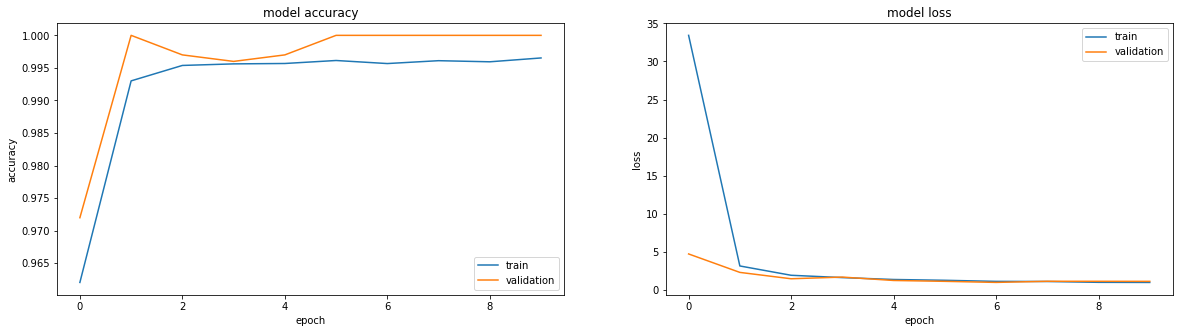

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
ix = 120
print(x_test[ix,:,0])
print()

pred = model.predict(x_test[ix:ix+1,:,:])
print(pred)
[int(x_test[ix].reshape(4,)[np.abs(x_test[ix].reshape(4,) - i).argmin()]) for i in list(pred[0])]

[ 15.  44.  11.  35.]

[[ 12.28593826  15.92690372  36.17679977  44.94926834]]


[11, 15, 35, 44]

In [16]:
test_list = [100,1672,6,226]
pred = model.predict(np.asarray(test_list).reshape(1,4,1))
print(test_list)
print(pred)

print([np.asarray(test_list).reshape(4,)[np.abs(np.asarray(test_list).reshape(4,) - i).argmin()] for i in list(pred[0])])

[100, 1672, 6, 226]
[[   49.83705521   101.28887939   292.64419556  1676.4005127 ]]
[6, 100, 226, 1672]
